In [1]:
#Imports all required packages from saved location
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
#import lightgbm as lgb

In [2]:
data = pd.read_csv ('/Users/charlieargent/Desktop/University of Exeter/Year 3/AI Project/dataset.csv')
print (data)




      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
5        0   43        2.0              0         0.0     0.0   
6        0   63        1.0              0         0.0     0.0   
7        0   45        2.0              1        20.0     0.0   
8        1   52        1.0              0         0.0     0.0   
9        1   43        1.0              1        30.0     0.0   
10       0   50        1.0              0         0.0     0.0   
11       0   43        2.0              0         0.0     0.0   
12       1   46        1.0              1        15.0     0.0   
13       0   41        3.0              0         0.0     1.0   
14       0   39        2.

In [3]:
#Changes the name of a few columns, in format: {old name, new name}
data = data.rename(columns={"male": "Sex_male"})
data = data.rename(columns={"age": "Age"})
data = data.rename(columns={"currentSmoker": "Smoker"})
data = data.rename(columns={"heartRate": "HeartRate"})
data = data.rename(columns={"glucose": "Glucose"})

In [4]:
#deletes the Smoker column, to see effect on accuracy
data = data.drop(columns="Smoker")

In [5]:
#Checks how many missing values there are
data.isnull().sum()


Sex_male             0
Age                  0
education          105
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
HeartRate            1
Glucose            388
TenYearCHD           0
dtype: int64

In [6]:
#Drops any rows with missing data
data.dropna(axis=0,inplace=True)

In [7]:
#Checks for missing values again
data.isnull().sum()

Sex_male           0
Age                0
education          0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
HeartRate          0
Glucose            0
TenYearCHD         0
dtype: int64

In [8]:
labels = data.pop("TenYearCHD").values
data = data.values
#gives the 10 year CHD data the name labels, this is so it can be called specifically later on in code

In [9]:
#split dataset in features and target variable
feature_cols = ['sex_male', 'Age', 'cigsPerDay','BPMeds','prevalentStroke','prevelantHyp', 'diabetes','totChol','sysBP','education','diaBP','BMI','HeartRate','Glucose']
X = feature_cols # Features
y = labels # Target variable

In [10]:
#Creates test and training sets 
x_train, x_test, y_train, y_test = train_test_split(data, labels,
                                                    test_size=.2,
                                                    random_state=5)

In [11]:
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [12]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


In [13]:
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8579234972677595


/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


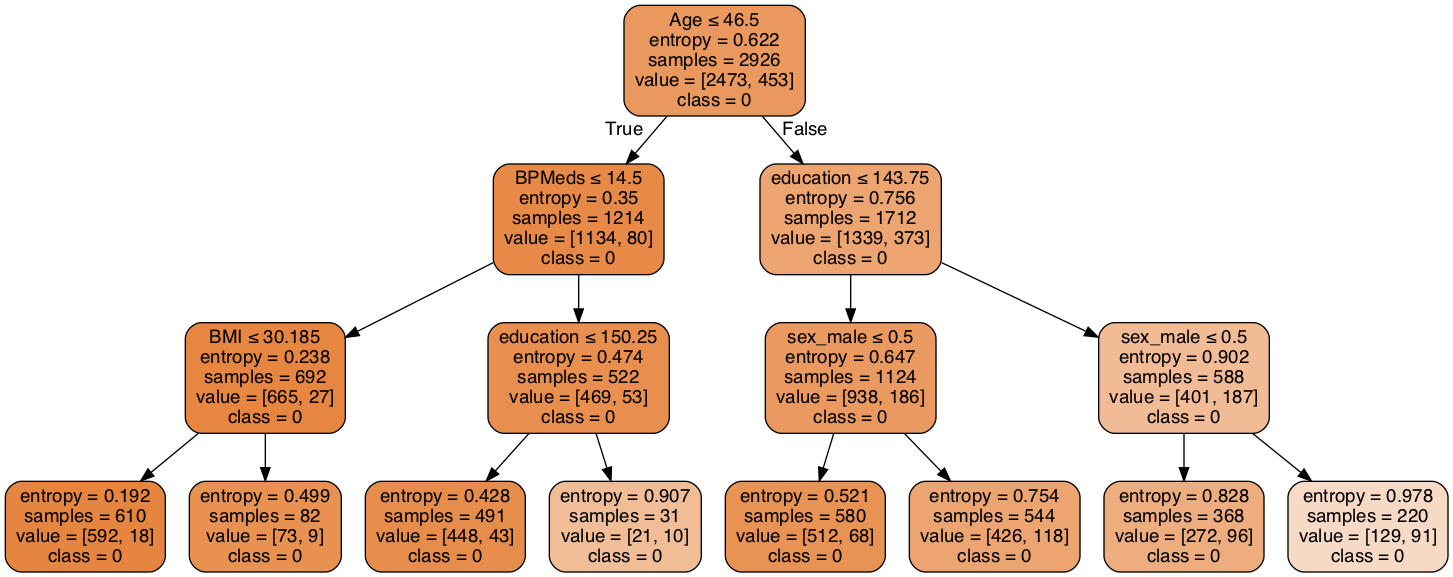

In [14]:
#code used to create a .png file of the actual decision tree process
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DecisionTree.png')

Image(graph.create_png())
